In [29]:
import pandas as pd 
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf

In [30]:
%matplotlib inline

In [31]:
con_dist = pd.read_csv("condom_dist_u.csv", index_col = "Community Area Name")
fgon = pd.read_csv("gonorrhea_females.csv", index_col = "Community Area Name")
#read in and label all csv files, make community area name the leftmost column

In [32]:
con_dist_group = con_dist.groupby(["Community Area Name"]).count() #group condom distribution sites csv file by community area
con_dist_group.dropna(inplace = True) #get rid of all blank rows
con_dist_group.rename(columns = {"Name" : "Number_of_Condom_Centers"}, inplace = True) #rename # of condom centers column to be more clear
#con_dist_group.head(5)
con_fgon_merged = con_dist_group.join(fgon) #merge condom distribution centers and female gonorrhea datasets
con_fgon_merged.rename(columns = {"Incidence Rate 2013" : "Incidence_Rate_2013"}, inplace = True)
con_fgon_merged.rename(columns = {"Incidence Rate 2014" : "Incidence_Rate_2014"}, inplace = True)
con_fgon_merged

,Number_of_Condom_Centers,Community Area,Cases 2000 Female 15-44,Incidence Rate 2000,Incidence Rate 2000 Lower CI,Incidence Rate 2000 Upper CI,Cases 2001 Female 15-44,Incidence Rate 2001,Incidence Rate 2001 Lower CI,Incidence Rate 2001 Upper CI,...,Incidence Rate 2012 Upper CI,Cases 2013 Female 15-44,Incidence_Rate_2013,Incidence Rate 2013 Lower CI,Incidence Rate 2013 Upper CI,Cases 2014 Female 15-44,Incidence_Rate_2014,Incidence Rate 2014 Lower CI,Incidence Rate 2014 Upper CI,WARNING
Community Area Name,,,,,,,,,,,,,,,,,,,,,
Archer Heights,1,57.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,0.0,Rate and confidence interval estimates for yea...
Auburn Gresham,2,71.0,241.0,1915.3,1673.5,2157.1,272.0,2200.1,1938.6,2461.6,...,2378.3,181.0,1743.2,1489.2,1997.2,143,1377.3,1151.6,1603.0,NaN
Austin,8,25.0,542.0,1927.7,1765.4,2090.0,556.0,2021.5,1853.5,2189.5,...,2196.7,452.0,2054.8,1865.4,2244.2,301,1368.4,1213.8,1523.0,NaN
Belmont Cragin,2,19.0,17.0,93.2,54.3,149.2,21.0,115.5,71.5,176.6,...,268.0,32.0,180.5,123.5,254.8,28,157.9,104.9,228.2,Rate and confidence interval estimates for yea...
Beverly,1,72.0,16.0,355.4,203.1,577.1,17.0,385.5,224.6,617.2,...,725.6,7.0,195.5,78.6,402.8,<5,NaN,NaN,NaN,Rate and confidence interval estimates for yea...
Brighton Park,2,58.0,5.0,48.7,15.8,113.6,7.0,68.2,27.4,140.5,...,140.1,5.0,48.6,15.8,113.4,8,77.8,33.6,153.3,Rate and confidence interval estimates for yea...
Calumet Heights,2,48.0,49.0,1548.2,1145.4,2046.8,40.0,1297.0,926.6,1766.2,...,1866.8,39.0,1654.6,1176.6,2261.9,26,1103.1,720.6,1616.3,NaN
Chatham,3,44.0,139.0,1680.0,1400.7,1959.3,123.0,1525.3,1255.7,1794.9,...,2257.6,78.0,1264.2,999.3,1577.8,87,1410.0,1129.4,1739.2,NaN
Chicago Lawn,1,66.0,153.0,1010.0,850.0,1170.0,185.0,1238.6,1060.1,1417.1,...,1566.7,113.0,867.2,707.3,1027.1,118,905.5,742.1,1068.9,NaN


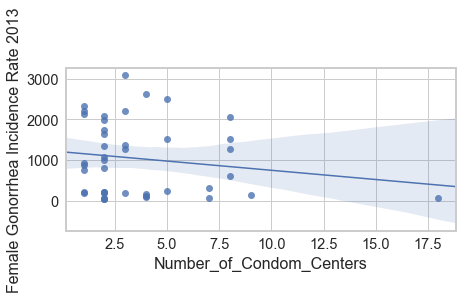

In [18]:
graph13 = sns.regplot(x = "Number_of_Condom_Centers", y = "Incidence_Rate_2013", data = con_fgon_merged) #create scatter plot to show relationship between # of condom sites and STI incidence rate
graph13.set_ylabel("Female Gonorrhea Incidence Rate 2013") #fix y axis label

In [34]:
import statsmodels.formula.api as smf
ols = smf.ols(formula = "Incidence_Rate_2013 ~ Number_of_Condom_Centers", data = con_fgon_merged)
model = ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Incidence_Rate_2013   R-squared:                       0.027
Model:                             OLS   Adj. R-squared:                  0.003
Method:                  Least Squares   F-statistic:                     1.117
Date:                 Tue, 28 Nov 2017   Prob (F-statistic):              0.297
Time:                         20:26:04   Log-Likelihood:                -344.11
No. Observations:                   42   AIC:                             692.2
Df Residuals:                       40   BIC:                             695.7
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 1203.3819    210.514      5.716      0.000     777.917    1628.847
Number_of_Condom_Centers   -45.4396     42.992     -1.057      0.297    -132.331      41.451
==============================================================================
Omnibus:                        5.488   Durbin-Watson:                   1.743
Prob(Omnibus):                  0.064   Jarque-Bera (JB):                3.250
Skew:                           0.481   Prob(JB):                        0.197
Kurtosis:                       2.035   Cond. No.                         7.63
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

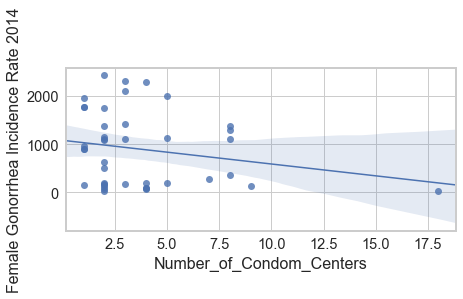

In [19]:
graph14 = sns.regplot(x = "Number_of_Condom_Centers", y = "Incidence_Rate_2014", data = con_fgon_merged) #create scatter plot to show relationship between # of condom sites and STI incidence rate
graph14.set_ylabel("Female Gonorrhea Incidence Rate 2014") #fix y axis label

In [33]:
import statsmodels.formula.api as smf
ols = smf.ols(formula = "Incidence_Rate_2014 ~ Number_of_Condom_Centers", data = con_fgon_merged)
model = ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Incidence_Rate_2014   R-squared:                       0.043
Model:                             OLS   Adj. R-squared:                  0.018
Method:                  Least Squares   F-statistic:                     1.750
Date:                 Tue, 28 Nov 2017   Prob (F-statistic):              0.194
Time:                         20:25:59   Log-Likelihood:                -329.05
No. Observations:                   41   AIC:                             662.1
Df Residuals:                       39   BIC:                             665.5
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 1081.0010    181.044      5.971      0.000     714.805    1447.197
Number_of_Condom_Centers   -49.1612     37.164     -1.323      0.194    -124.332      26.010
==============================================================================
Omnibus:                        6.249   Durbin-Watson:                   1.723
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                3.075
Skew:                           0.420   Prob(JB):                        0.215
Kurtosis:                       1.953   Cond. No.                         7.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""